In [23]:
#pip install matplotlib --user

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [13]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [14]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [15]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [16]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [20]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [25]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [28]:
for col in client_df:
    print(col, " : ", client_df[col].nunique())

id  :  14606
channel_sales  :  8
cons_12m  :  11065
cons_gas_12m  :  2112
cons_last_month  :  4751
date_activ  :  1796
date_end  :  368
date_modif_prod  :  2129
date_renewal  :  386
forecast_cons_12m  :  13993
forecast_cons_year  :  4218
forecast_discount_energy  :  12
forecast_meter_rent_12m  :  3528
forecast_price_energy_off_peak  :  516
forecast_price_energy_peak  :  329
forecast_price_pow_off_peak  :  41
has_gas  :  2
imp_cons  :  7752
margin_gross_pow_ele  :  2391
margin_net_pow_ele  :  2391
nb_prod_act  :  10
net_margin  :  11965
num_years_antig  :  13
origin_up  :  6
pow_max  :  698
churn  :  2


In [31]:
for col in client_df.columns:
    print(client_df[col].value_counts())

id
24011ae4ebbe3035111d65fa7c15bc57    1
2fae70276cd7a4874a2aefcd68d5a184    1
a7a9dac0ffc2ad56c66a1b08d53d0e51    1
6cfbce2099a4163ea4fe422fb28829ea    1
4289e929ecd35a0754e697feb24a091b    1
                                   ..
0b69432a3ceee7763bf86ffe30c6bc2d    1
6cabca88c760284183f51f84e4a27b1e    1
de92494d7140dc94be6a1ebafaf98056    1
a8e828bfad0869527e9acdd39a36cc91    1
563dde550fd624d7352f3de77c0cdfcd    1
Name: count, Length: 14606, dtype: int64
channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64
cons_12m
0          117
2882597     27
3329244     24
1743025     18
3926060     18
          ... 
22927        1
2630         1
6346         1
7985         1
7223       

In [17]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [22]:
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [26]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


for col in price_df.columns:
    print(col, " : ", price_df[col].nunique())

In [33]:
for col in price_df.columns:
    print(price_df[col].value_counts())

id
038af19179925da21a25619c5a24b745    12
97589d95ec46ab31ef238d18a616403f    12
97adbcd721fae4874f7ee287ea84200d    12
d74b4544363be674855cf931b6b8af25    12
27276020e48d73f589788d4e37c51879    12
                                    ..
83cf18b07114e495ae8b7fb235e45ee2     8
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: count, Length: 16096, dtype: int64
price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64
price_off_peak_var
0.152445    6291
0.151367    5652
0.125976    5139
0.127566    4373
0.147600    4285
            ... 
0.140656       1
0.124354       1
0.149091       1
0.119542       1
0.124808       1
Name: count, Length: 1853, dtype: int64
pric

## Data Visualization

In [44]:
def plot_stacked_bars(dataframe, title_, size_=(18,10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(
        kind = "bar",
        stacked = True,
        figsize = size_,
        rot = rot_,
        title = title_
    )
    annotate_stacked_bars(ax,textsize=14)
    plt.legend(["Retention","Churn"],loc=legend_)
    plt.ylabel("Company base (%)")
    plt.show()
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == '0.0':
            continue
        ax.annotate(
            value, ((p.get_x() + p.get_width()/2)*pad-0.05, (p.get_y() + p.get_height()/2)*pad),
            color = colour,
            size = textsize
        )

## CHURN

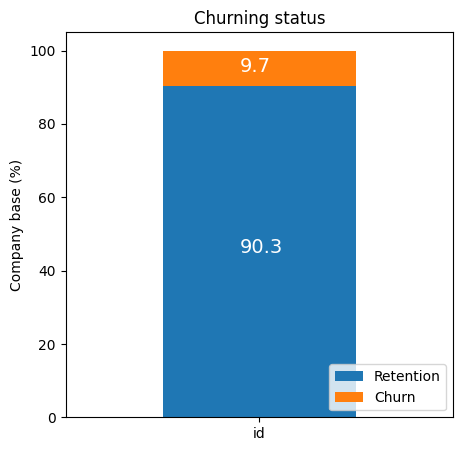

In [53]:
churn = client_df[['id','churn']]
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum()*100
plot_stacked_bars(churn_percentage.transpose(),"Churning status",(5,5),legend_="lower right")

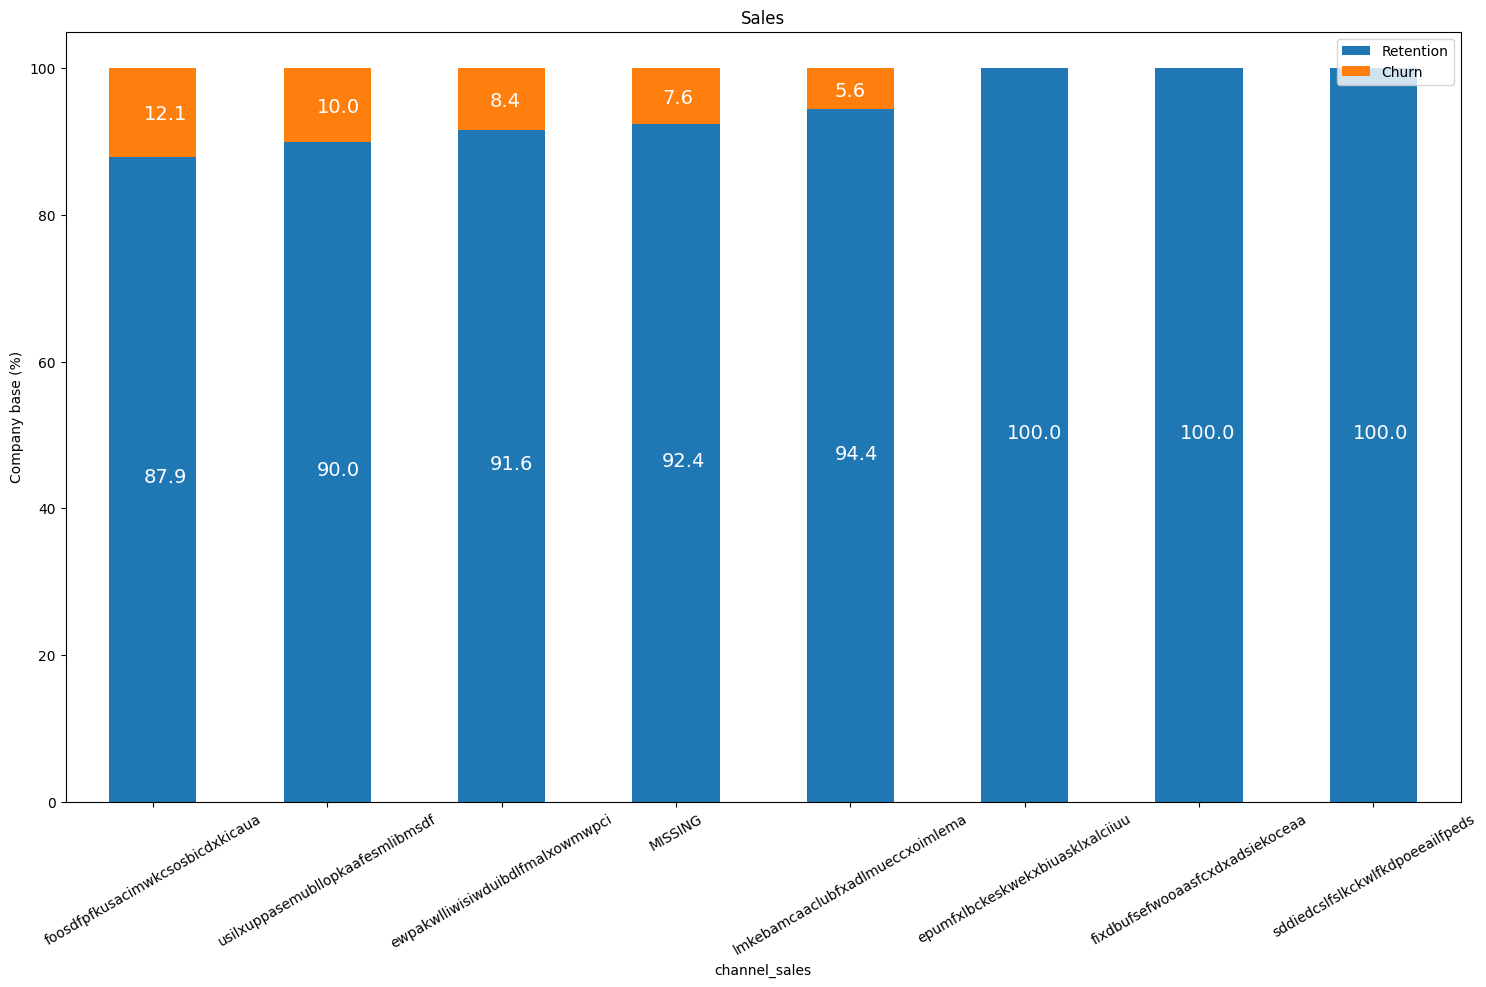

In [63]:
channel=client_df[['id','channel_sales','churn']]
channel = client_df.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[0])
plot_stacked_bars(channel_churn,"Sales", rot_=30)

In [75]:
def plot_distribution(dataframe, column, ax, bins_=50):
    temp = pd.DataFrame({
        "Retention" : dataframe[dataframe['churn']==0][column],
        "Churn" : dataframe[dataframe['churn']==1][column]
    })
    temp[['Retention','Churn']].plot(kind='hist', ax=ax, bins=bins_, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

In [71]:
consumption = client_df[['cons_12m','cons_gas_12m','cons_last_month','has_gas','imp_cons','id','churn']]

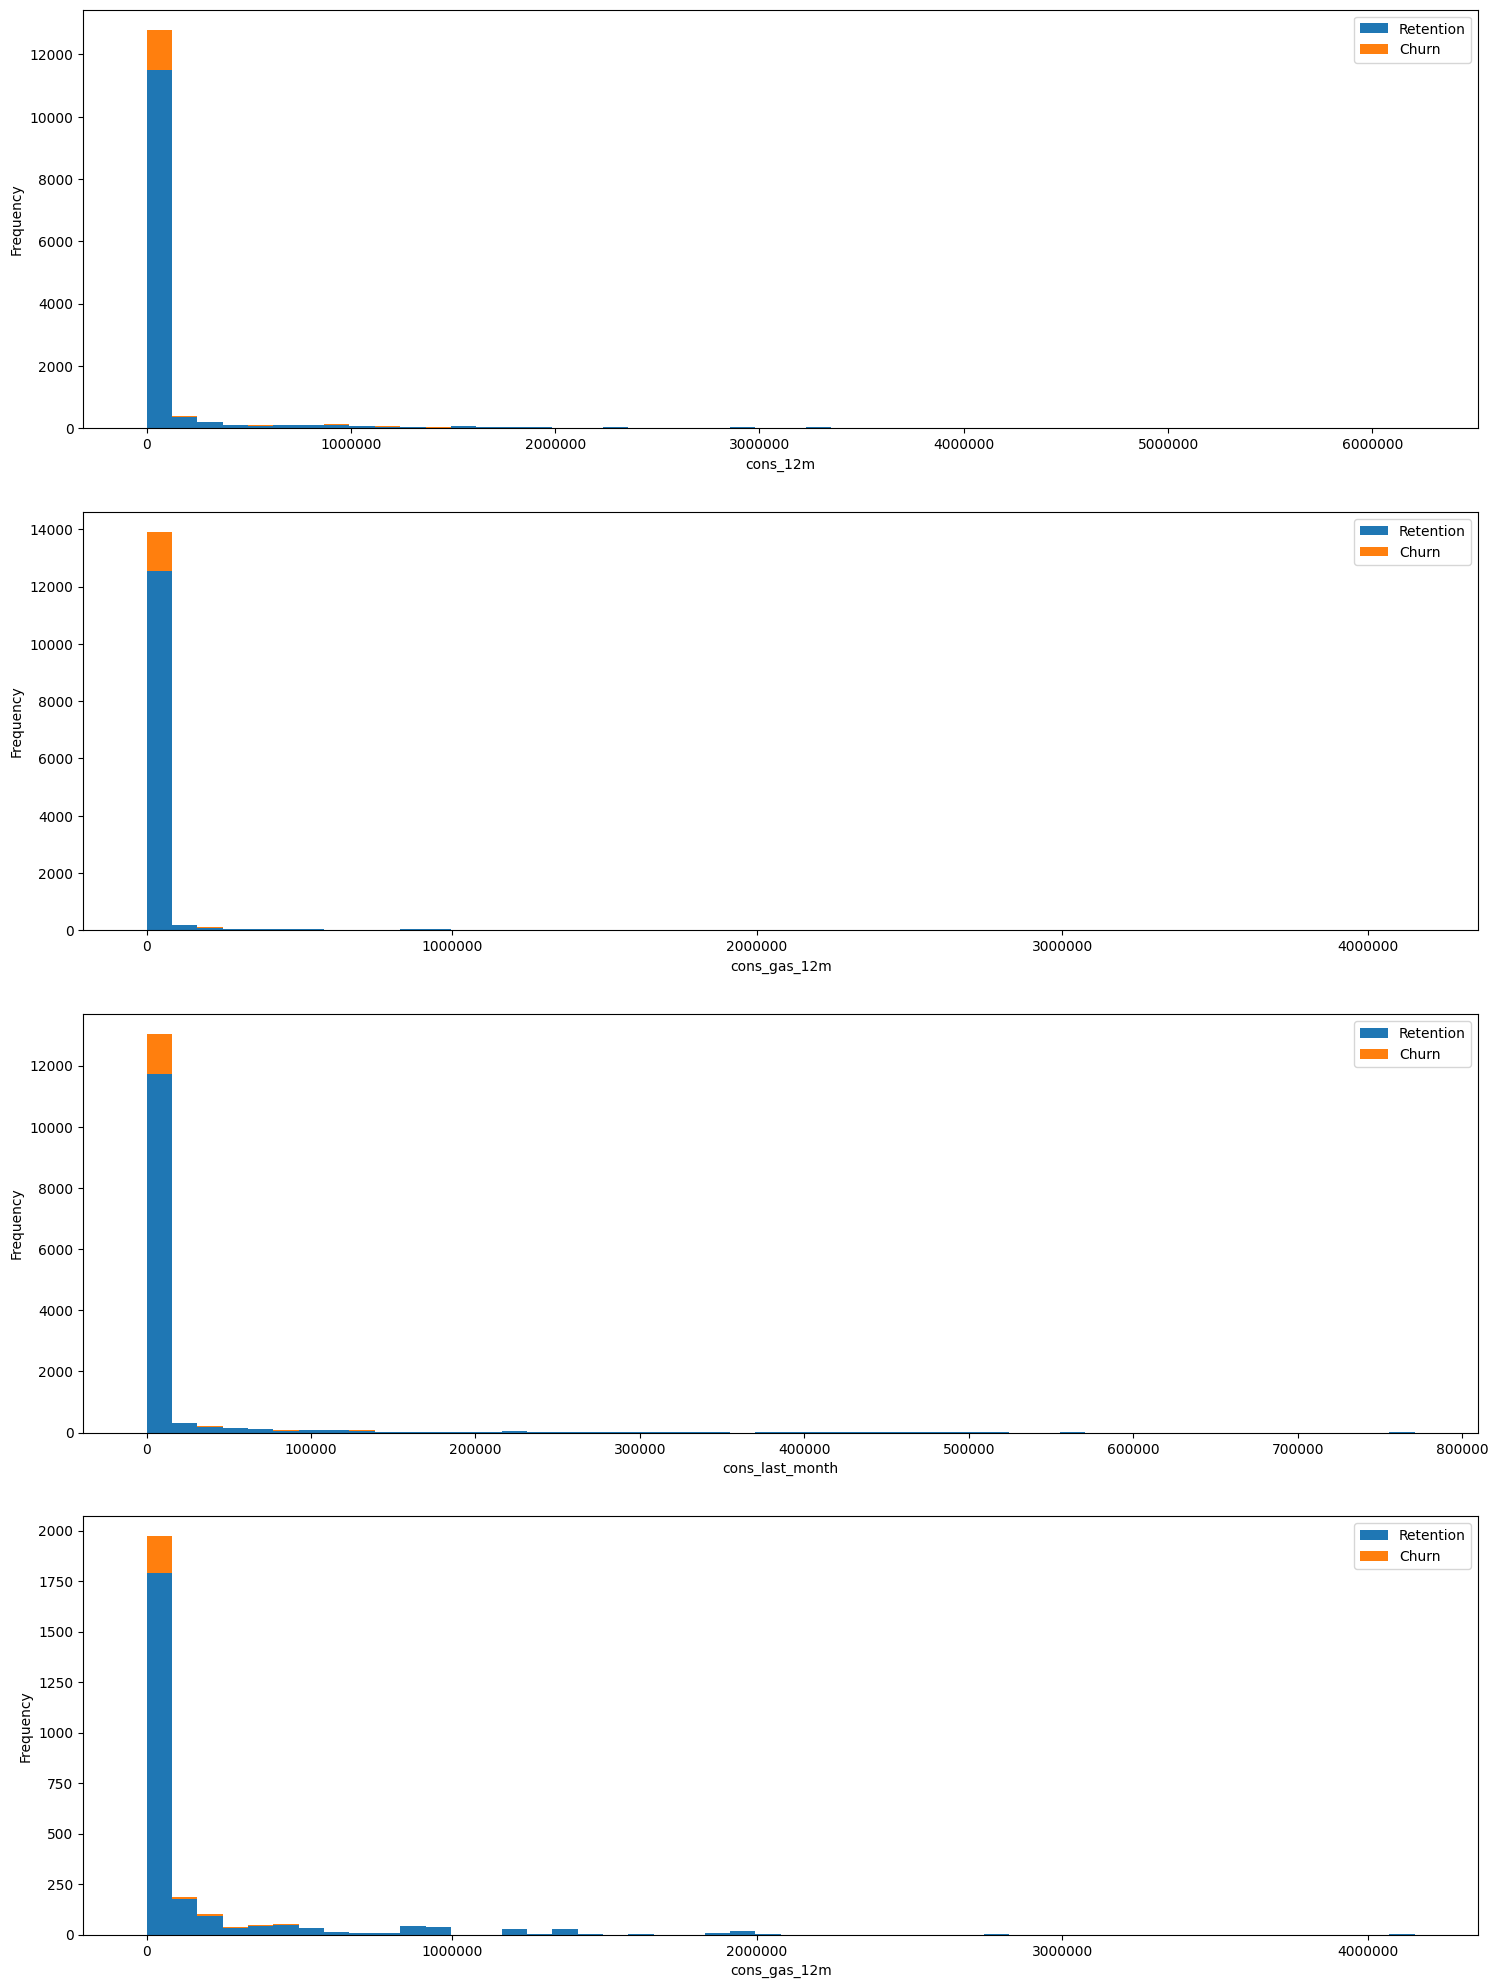

In [77]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

axs=axs.flatten()

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption, 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption[consumption['has_gas']=='t'], 'cons_gas_12m', axs[3])

<Axes: xlabel='imp_cons'>

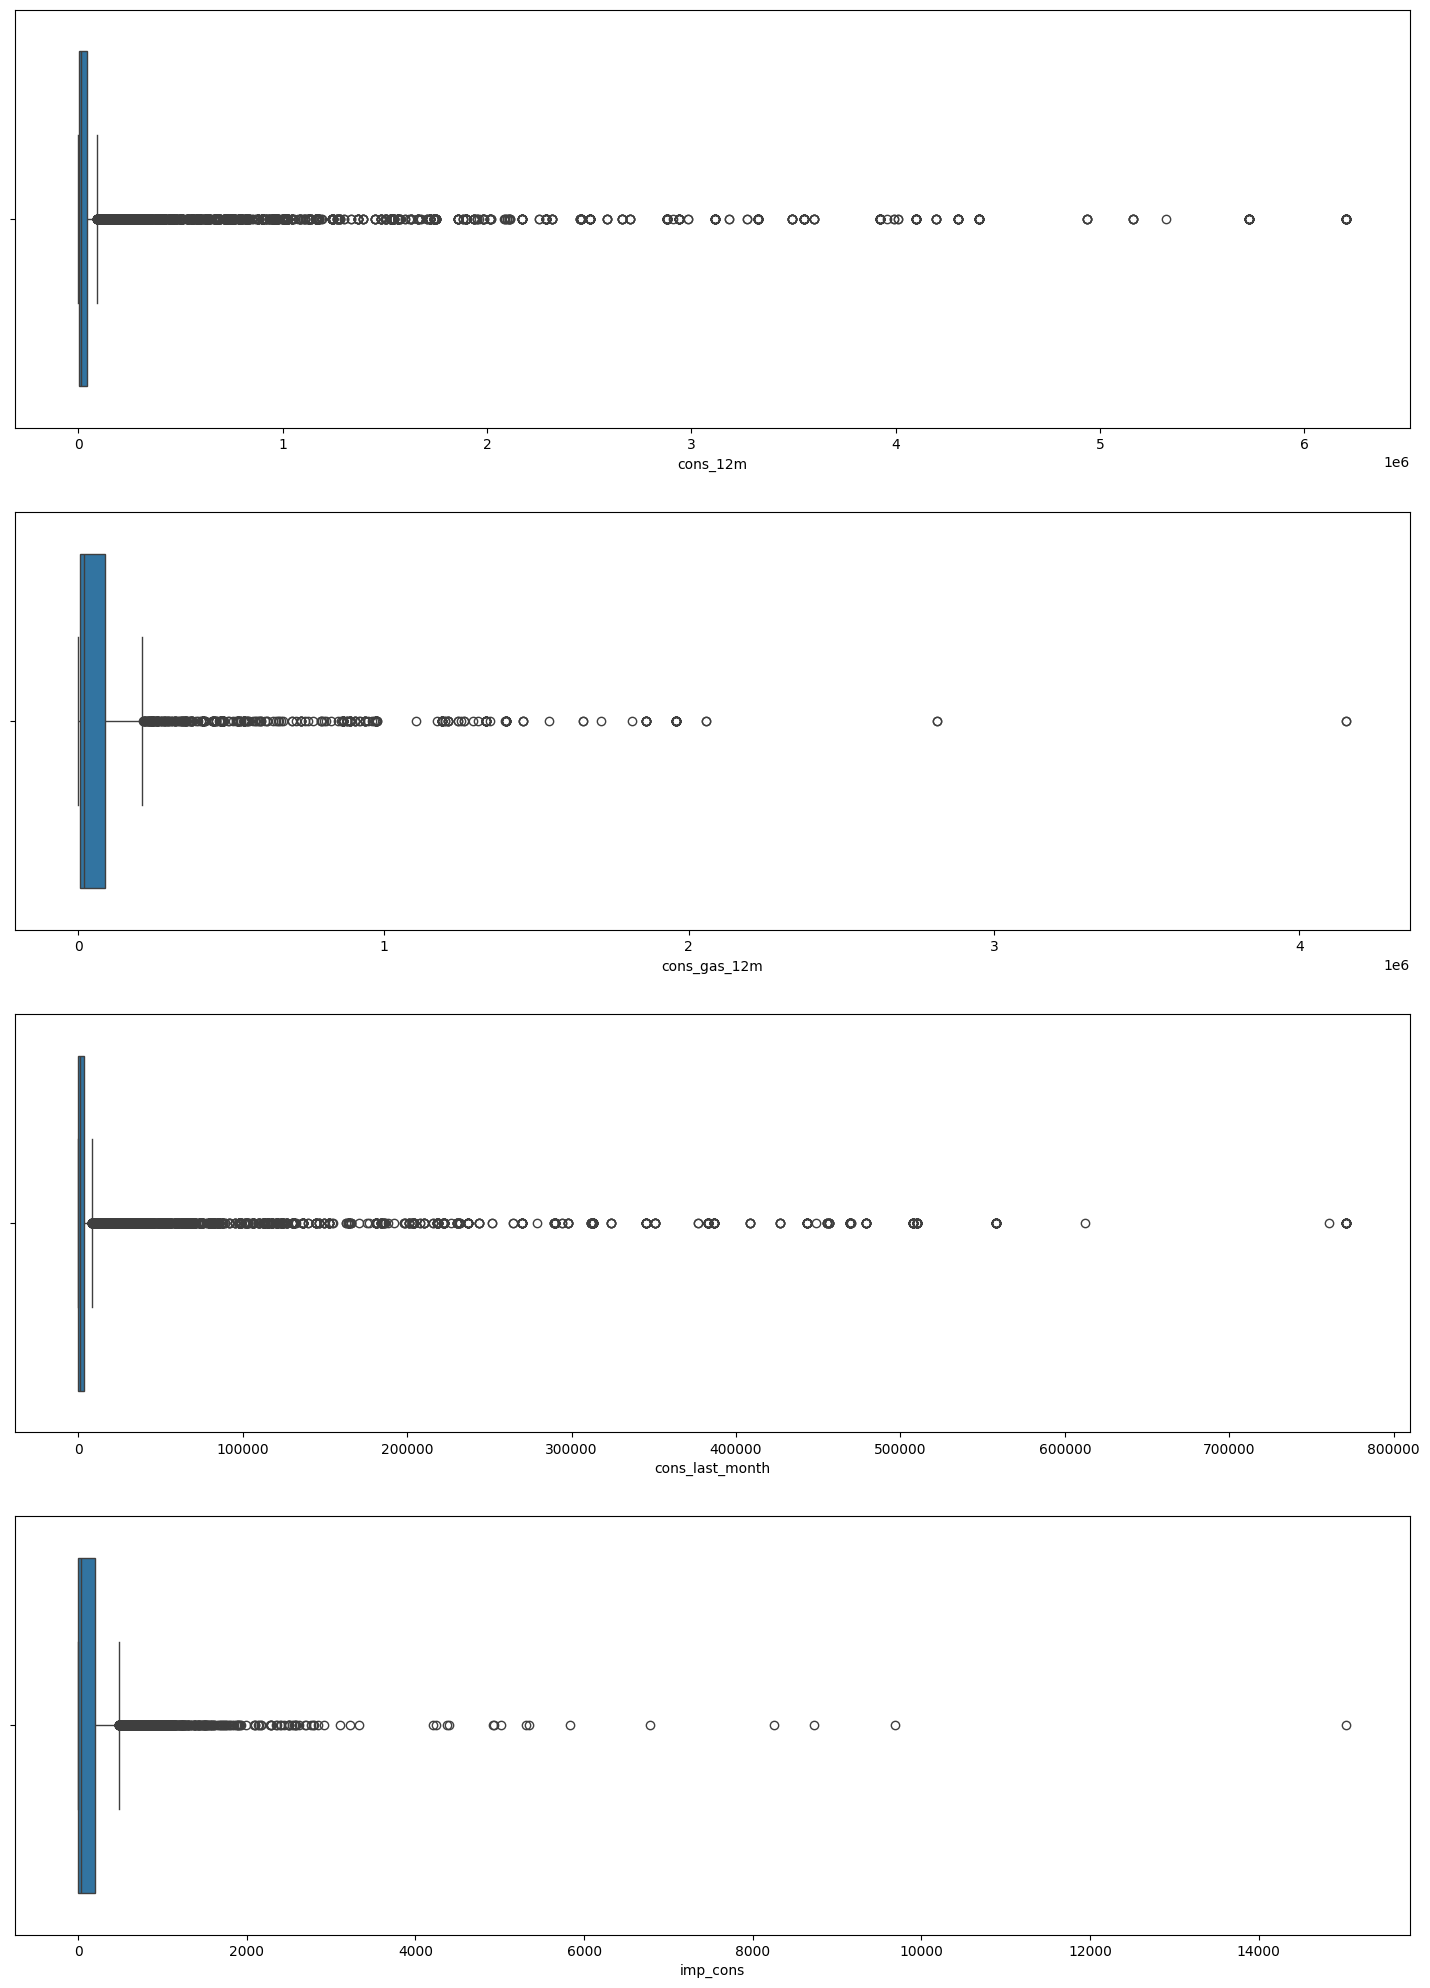

In [93]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

sns.boxplot(consumption['cons_12m'], ax=axs[0], orient='h')
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'], ax=axs[1], orient='h')
sns.boxplot(consumption['cons_last_month'], ax=axs[2], orient='h')
sns.boxplot(consumption['imp_cons'], ax=axs[3], orient='h')

In [81]:
forecast = client_df[['id','churn','forecast_cons_12m','forecast_cons_year',
             'forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_off_peak',
            'forecast_price_energy_peak','forecast_price_pow_off_peak']]

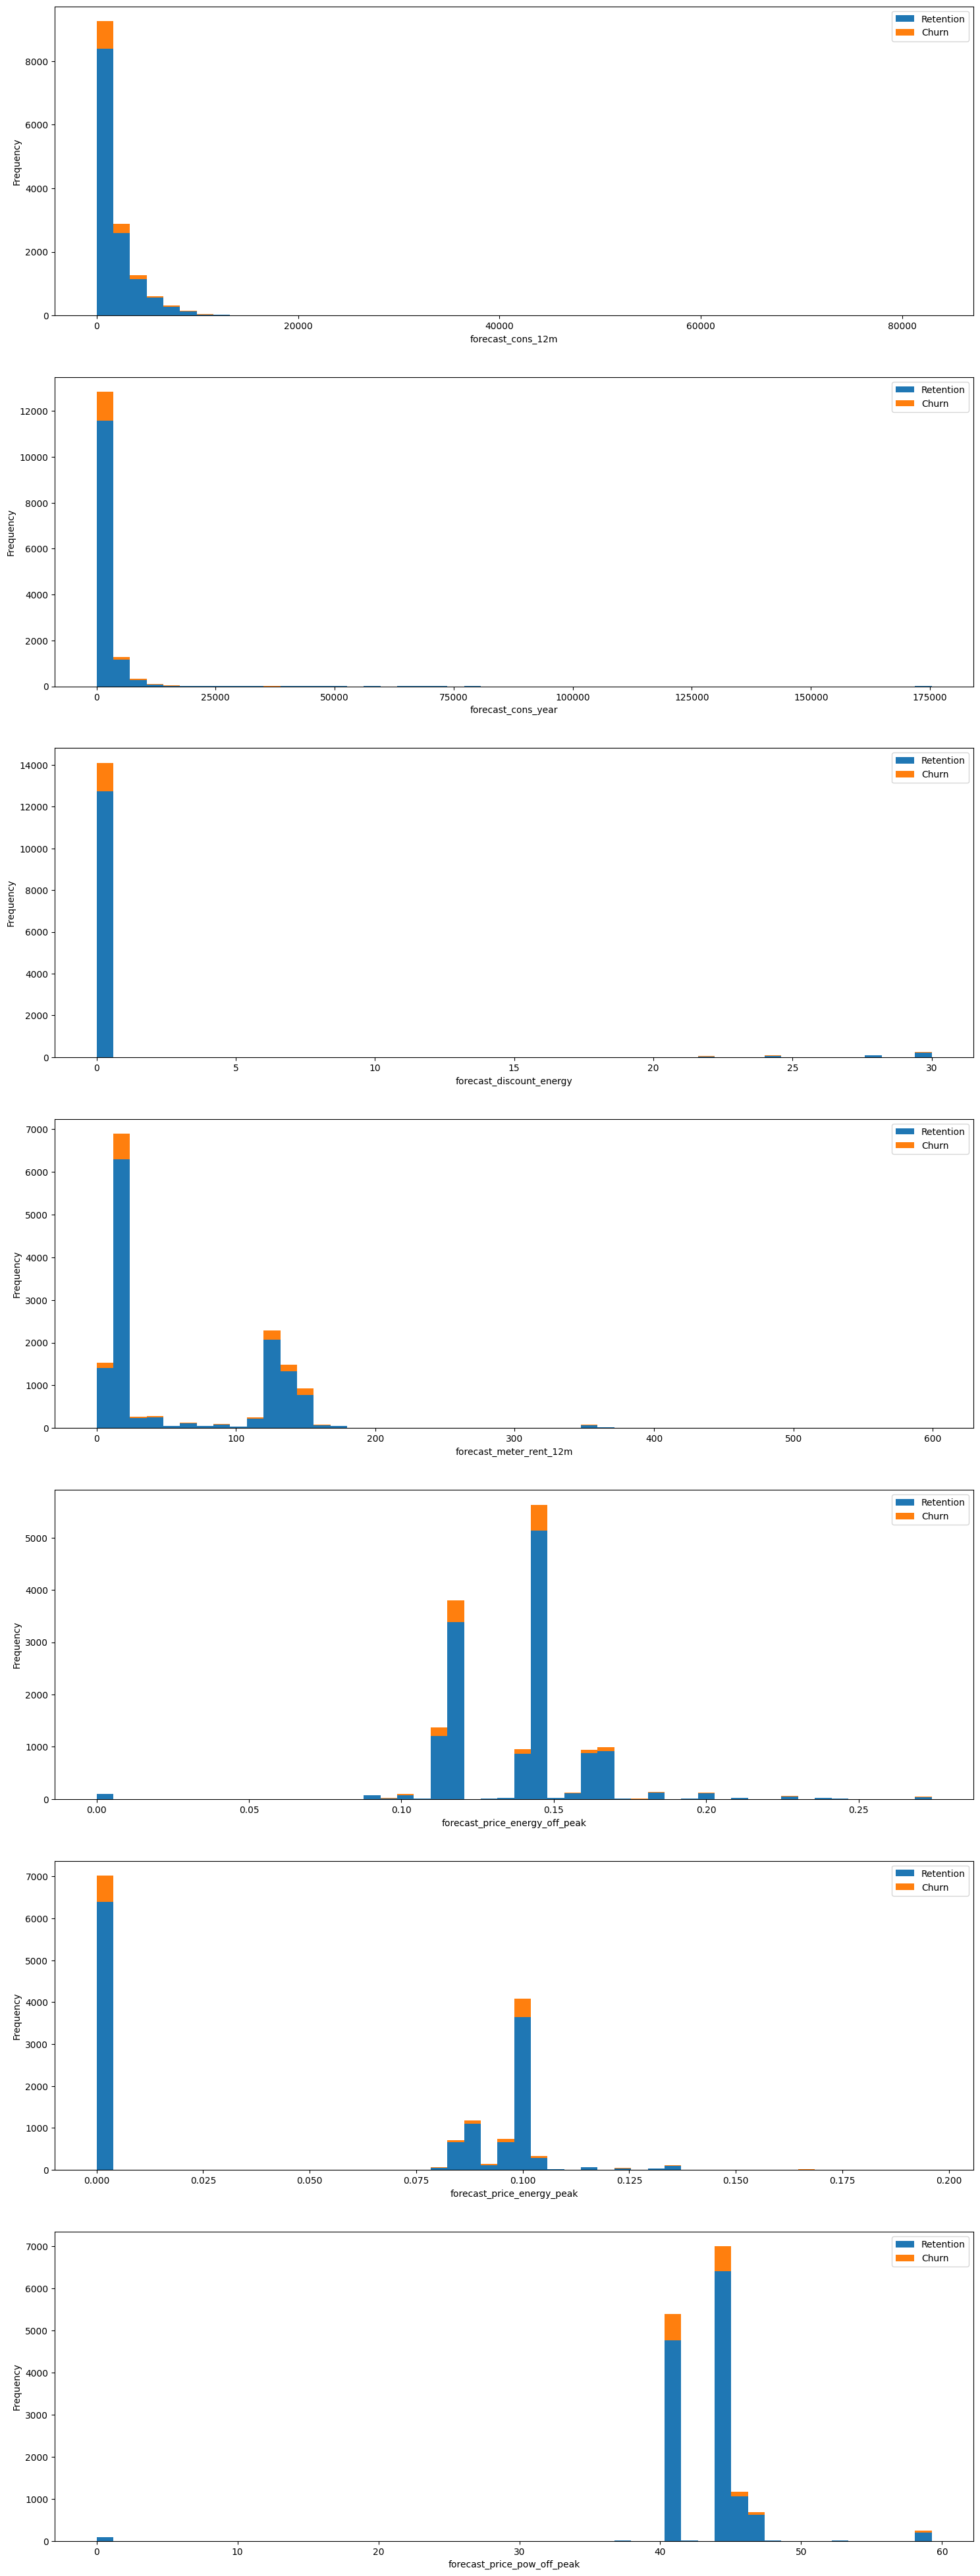

In [85]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(forecast, "forecast_cons_year", axs[1])
plot_distribution(forecast, "forecast_discount_energy", axs[2])
plot_distribution(forecast, "forecast_meter_rent_12m", axs[3])
plot_distribution(forecast, "forecast_price_energy_off_peak", axs[4])
plot_distribution(forecast, "forecast_price_energy_peak", axs[5])
plot_distribution(forecast, "forecast_price_pow_off_peak", axs[6])

## Contract

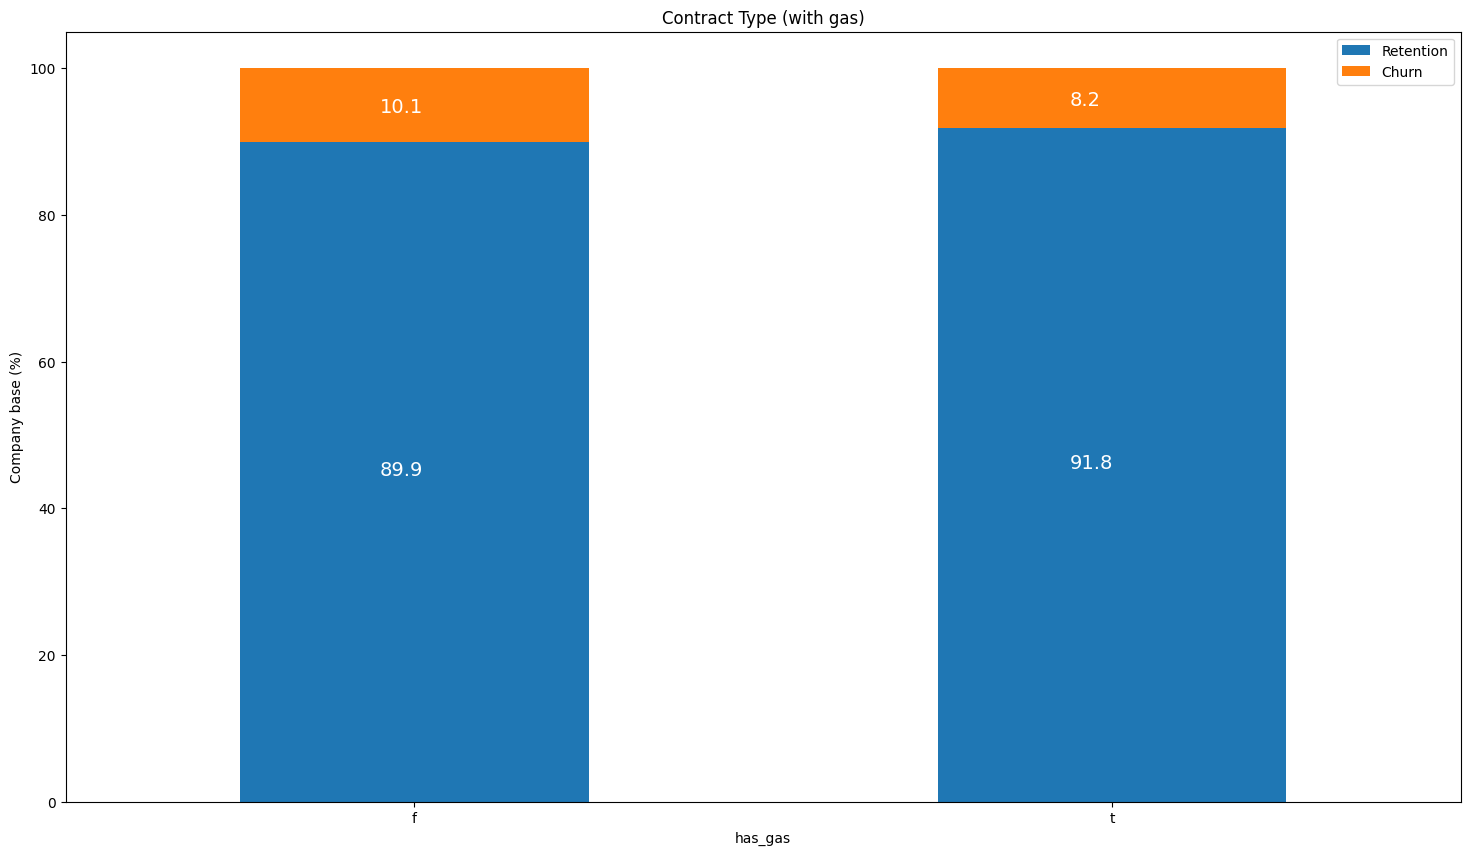

In [103]:
contract_type = client_df[['id','has_gas','churn']]
contract = contract_type.groupby([contract_type['has_gas'],contract_type['churn']])['id'].count().unstack(level=1) 
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(contract_percentage, 'Contract Type (with gas)')

## Margins

In [105]:
margin = client_df[['id','margin_gross_pow_ele','margin_net_pow_ele','net_margin']]

<Axes: xlabel='net_margin'>

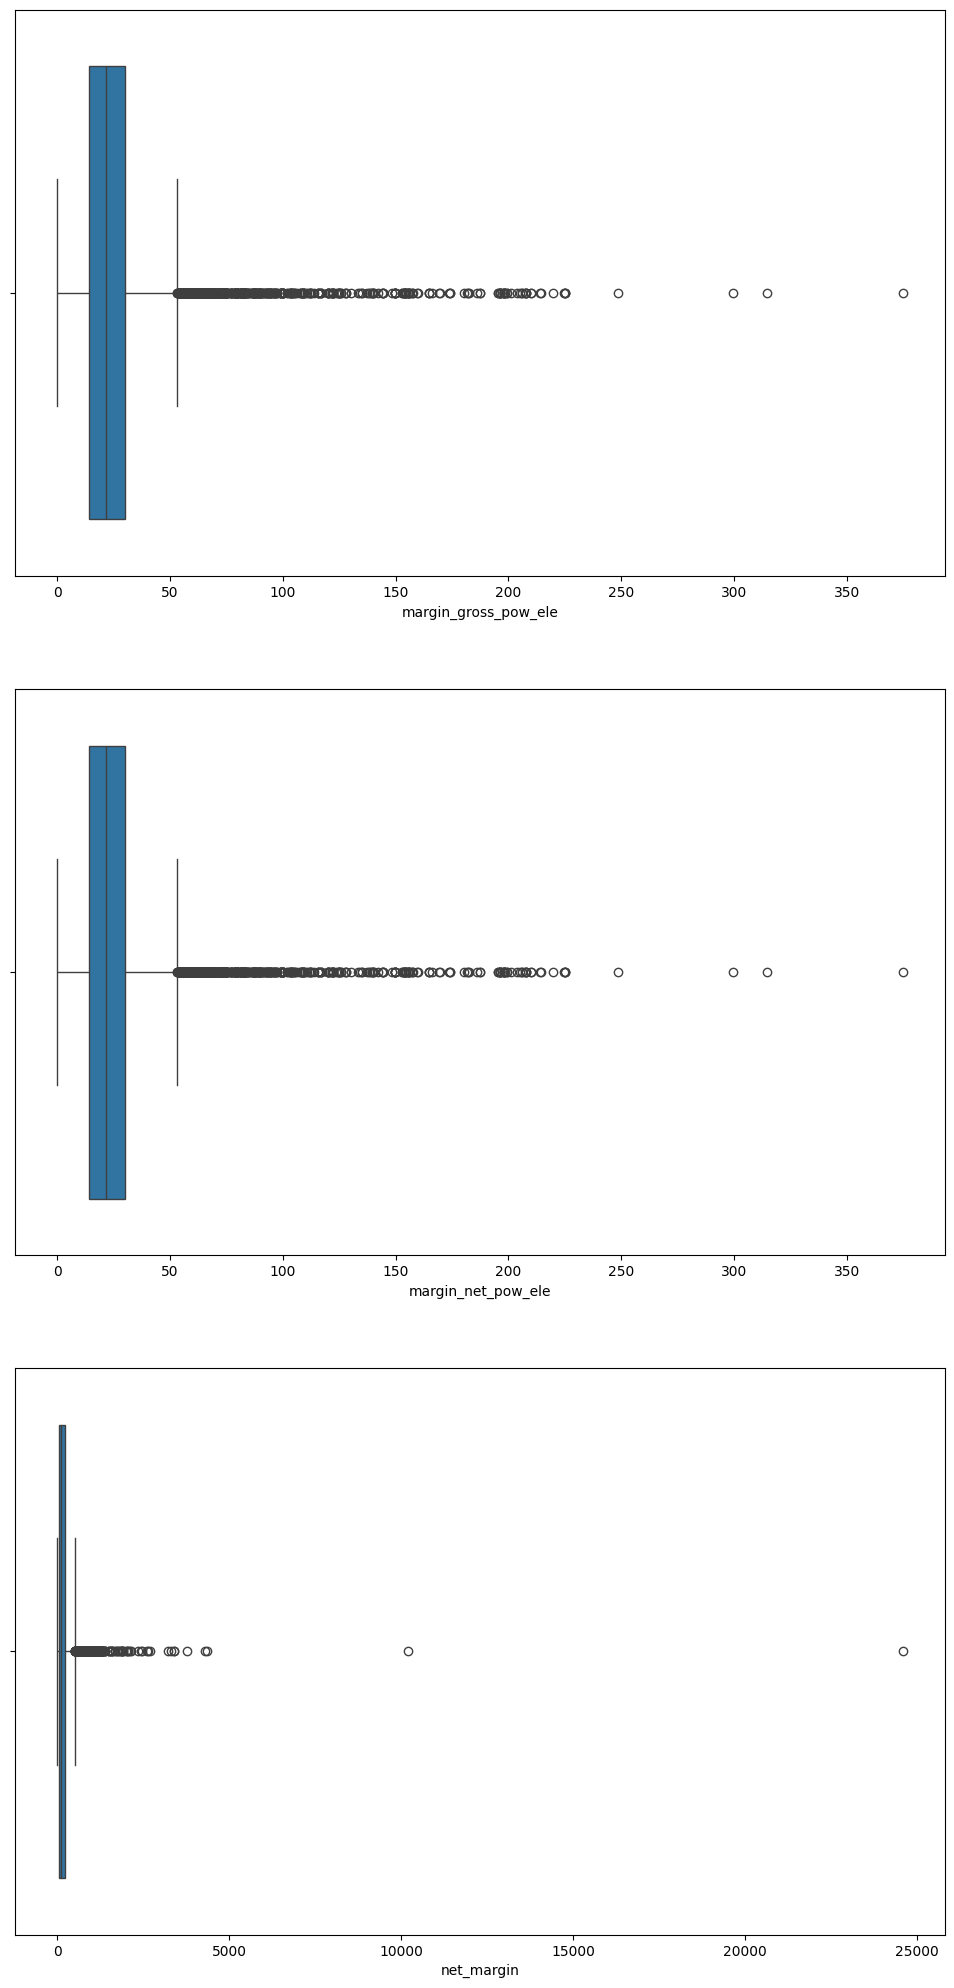

In [110]:
fig, axs = plt.subplots(nrows=3, figsize=(12,25))

sns.boxplot(margin['margin_gross_pow_ele'], ax=axs[0], orient='h')
sns.boxplot(margin['margin_net_pow_ele'], ax=axs[1], orient='h')
sns.boxplot(margin['net_margin'], ax=axs[2], orient='h')

## Subscribed Power

In [111]:
power = client_df[['id','pow_max','churn']]

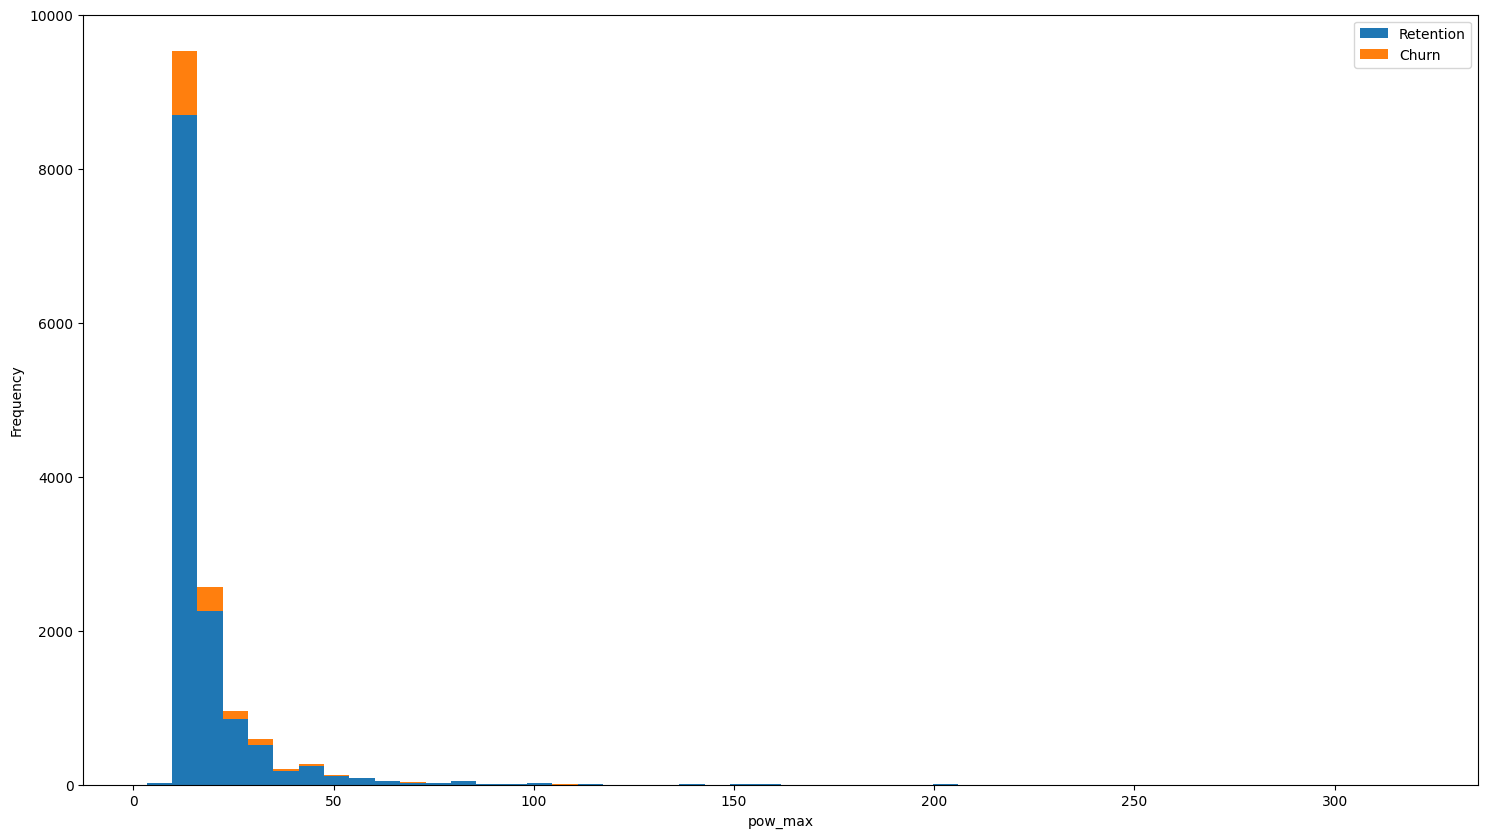

In [116]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, 'pow_max', axs)

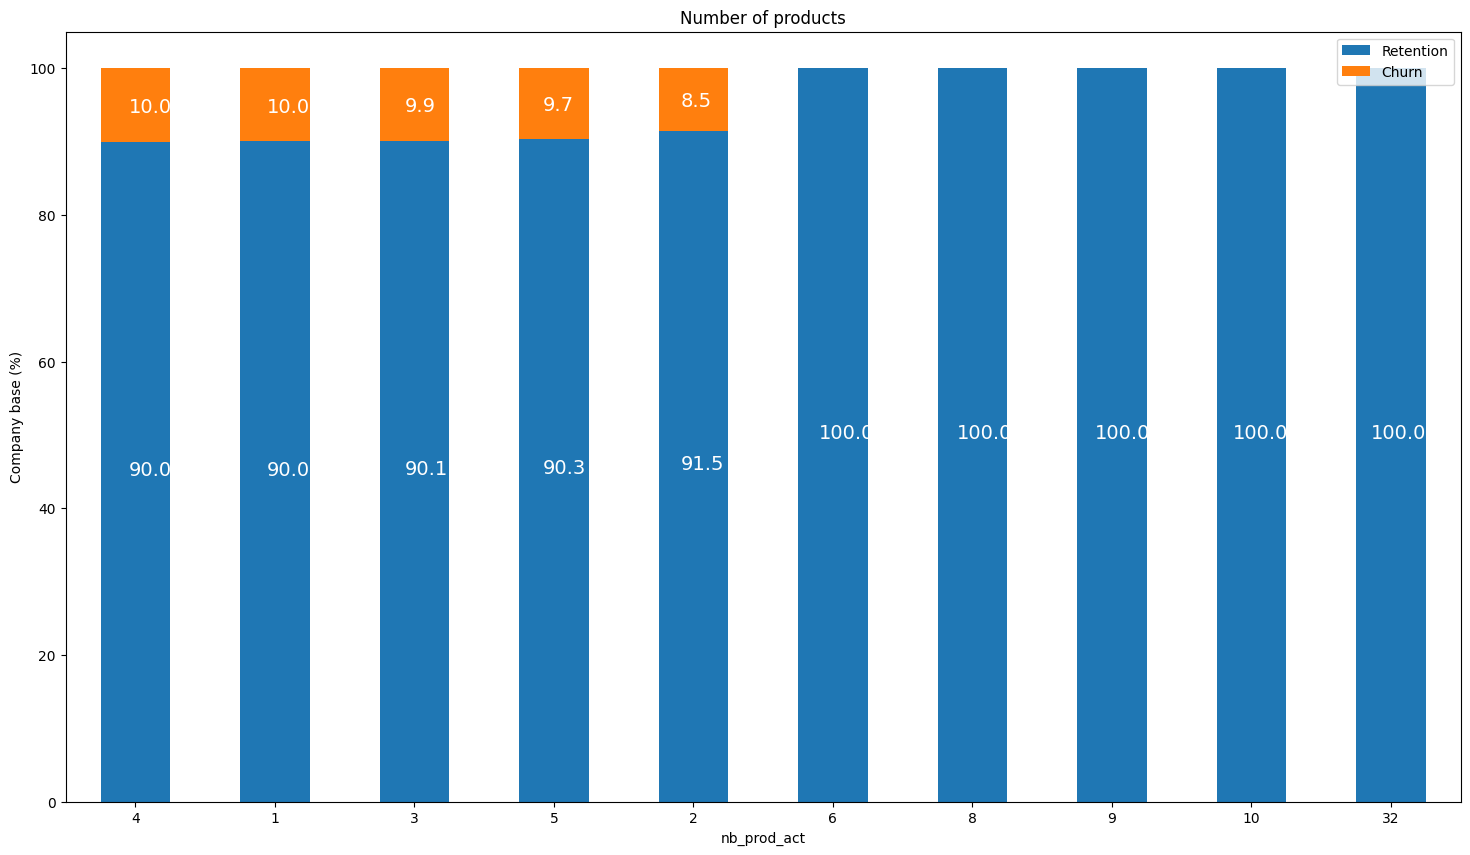

In [124]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others['nb_prod_act'],others['churn']])['id'].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

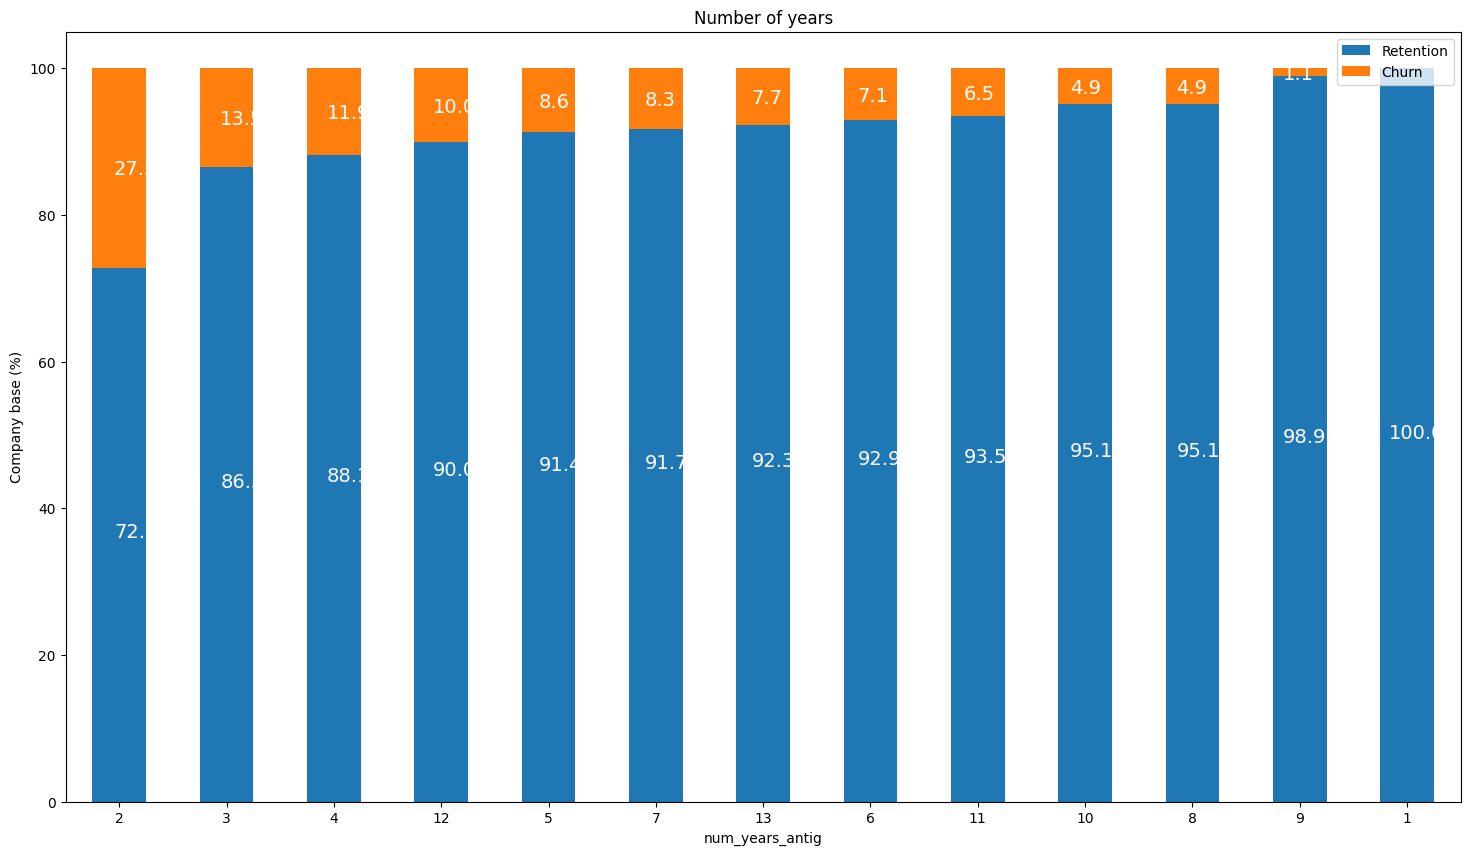

In [125]:
products = others.groupby([others['num_years_antig'],others['churn']])['id'].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of years")

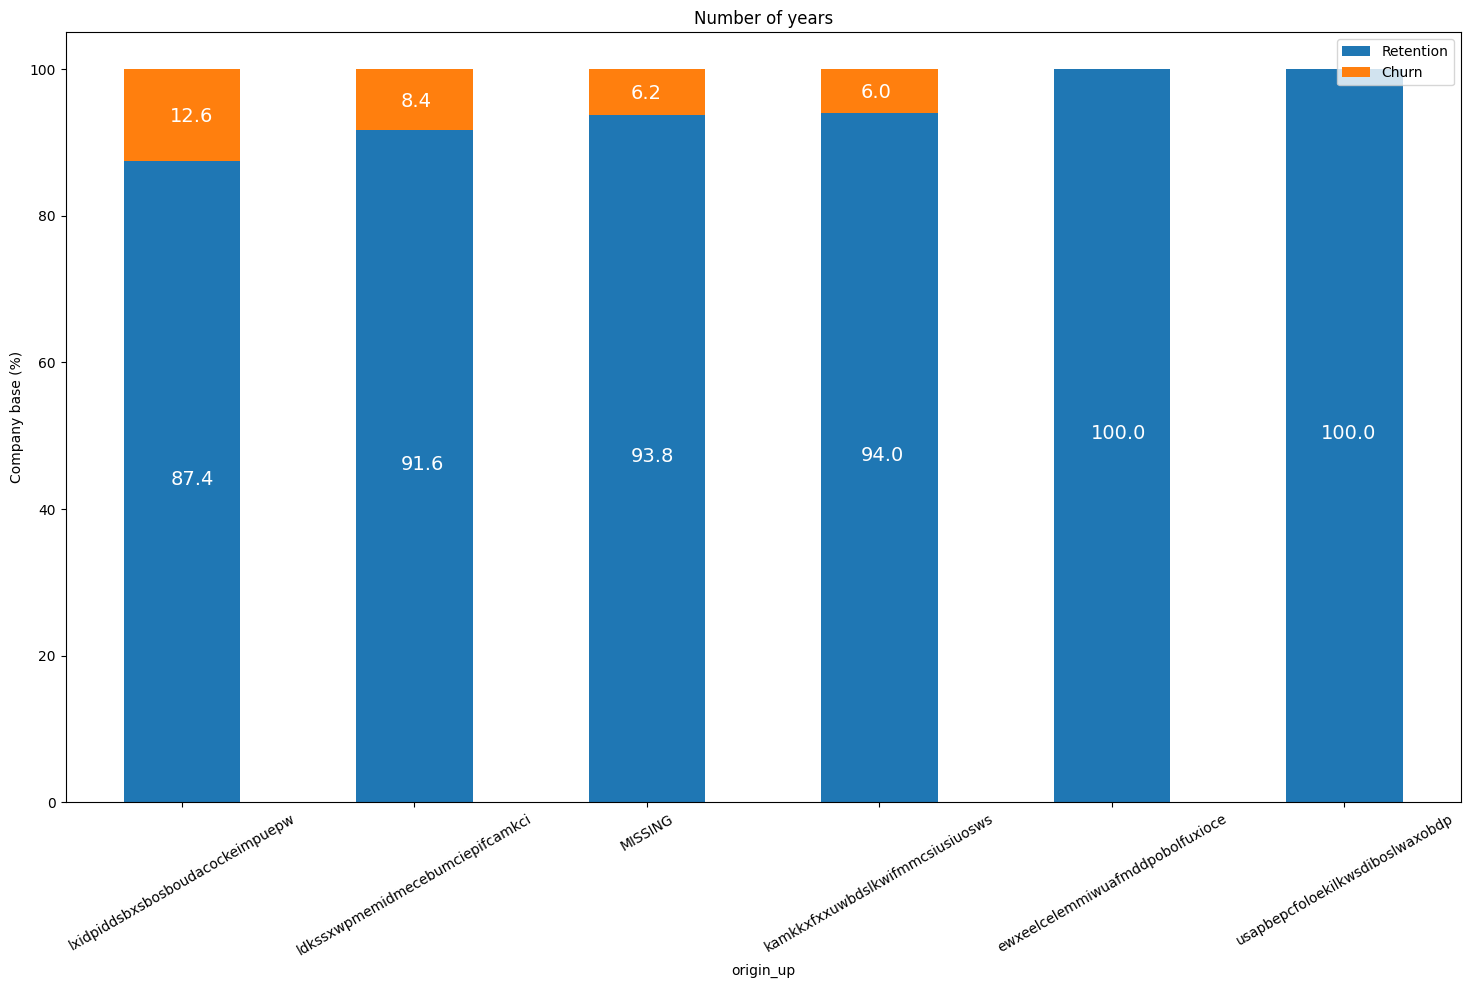

In [129]:
products = others.groupby([others['origin_up'],others['churn']])['id'].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of years", rot_=30)